Churn data analasis
1. importing the data to a variable df

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
df = pd.read_csv(r"data2\train.csv")
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


doing some primary analysis .

In [24]:
df.shape

(4250, 20)

there are **7043 rows and 21 columns** in the csv file.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

there are **no missing** values.

1) there are many outliers in contract 0 (which is one month).

    **this could indicate that there are miss labeled contract.**

In [26]:
df.describe()                                                                   

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


    checking for duplicate values.

In [27]:
for i in df:
    if df[i].dtype == 'object':
        print(i,df[i].unique())

state ['OH' 'NJ' 'OK' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY' 'ID' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'SC' 'WY' 'HI' 'NH' 'AK' 'GA' 'MD' 'AR' 'WI' 'OR'
 'MI' 'DE' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'VT' 'KY' 'ME'
 'MS' 'AL' 'NE' 'KS' 'TN' 'IL' 'PA' 'CT' 'ND']
area_code ['area_code_415' 'area_code_408' 'area_code_510']
international_plan ['no' 'yes']
voice_mail_plan ['yes' 'no']
churn ['no' 'yes']


    this shows all the unique values in each column.

**EDA**
1) make a box plot for each numeric data ot check for outliers. (nothing intresting)
2) make bar chart for each catogarical data to check for abnormal distributions. (nothing intresting)

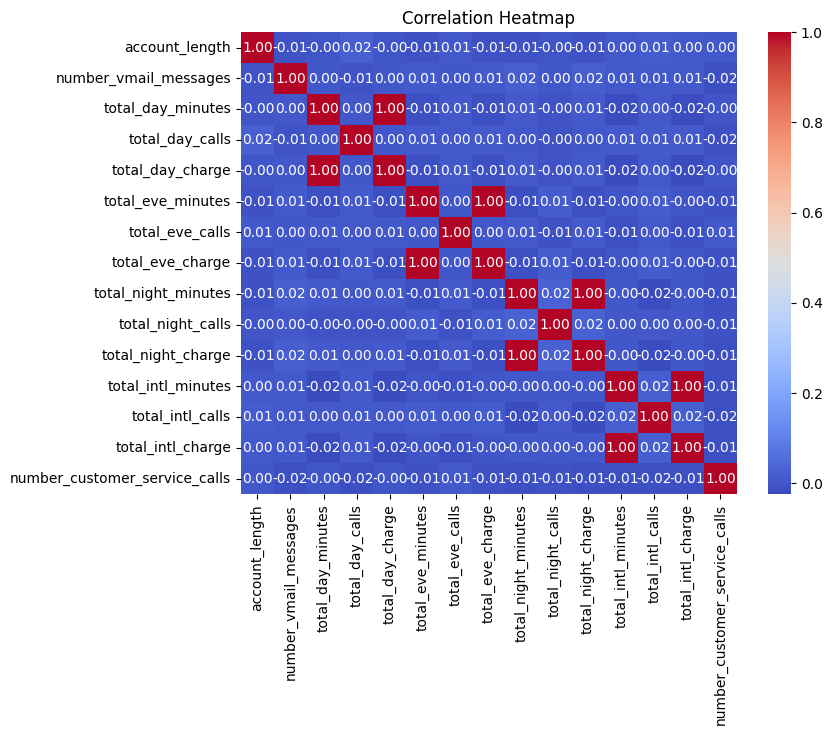

In [28]:
correlation_matrix = df[df.select_dtypes(include='number').columns ].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

    we see some of the columns are highly coorelated with other columns.
    so we only need one of them to capture the data.

In [29]:
df.drop(columns=['total_day_minutes','total_eve_minutes', 'total_night_minutes','total_intl_minutes'],inplace=True)

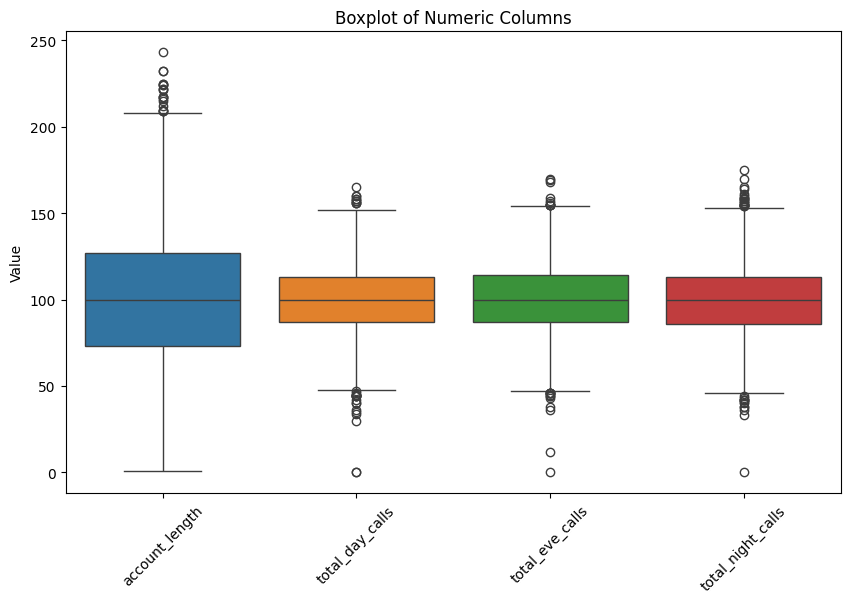

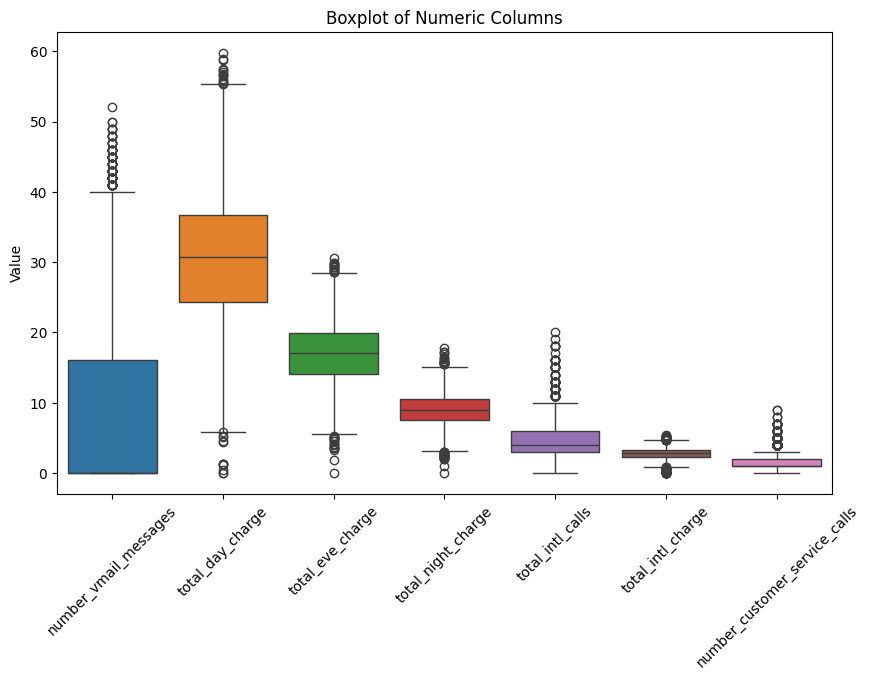

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df.select_dtypes(include='number').columns ][['account_length', 'total_day_calls', 'total_eve_calls',  'total_night_calls']])
plt.title('Boxplot of Numeric Columns')
plt.ylabel('Value')
plt.xticks(rotation=45) 
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df.select_dtypes(include='number').columns ].drop(columns=['account_length', 'total_day_calls', 'total_eve_calls', 'total_night_calls']))
plt.title('Boxplot of Numeric Columns')
plt.ylabel('Value')
plt.xticks(rotation=45) 
plt.show()

    there are outliers in each numeric column,
    lets cap the outliers using q3 and q1.

In [31]:
def replace_outliers_with_q1_q3(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    q2 = series.quantile(0.5)
    iqr = q3-q1
    for idx in range(len(series)):
        if series.iloc[idx] > q2 + iqr:
            series.iloc[idx] = q3
        elif series.iloc[idx] < q2 - iqr:
            series.iloc[idx] = q1
    return series

df_cleaned = df[df.select_dtypes(include='number').columns ].apply(replace_outliers_with_q1_q3)

print("\nDataFrame with Outliers Replaced by Q1 and Q3:")
print(df_cleaned)


DataFrame with Outliers Replaced by Q1 and Q3:
      account_length  number_vmail_messages  total_day_calls  \
0                107                     16              123   
1                137                      0              114   
2                 84                      0               87   
3                 75                      0              113   
4                121                     16               88   
...              ...                    ...              ...   
4245              83                      0               87   
4246              73                      0               89   
4247              75                      0              101   
4248              50                     16              113   
4249              86                     16              102   

      total_day_charge  total_eve_calls  total_eve_charge  total_night_calls  \
0                27.47              103           16.6200                103   
1                41.38 

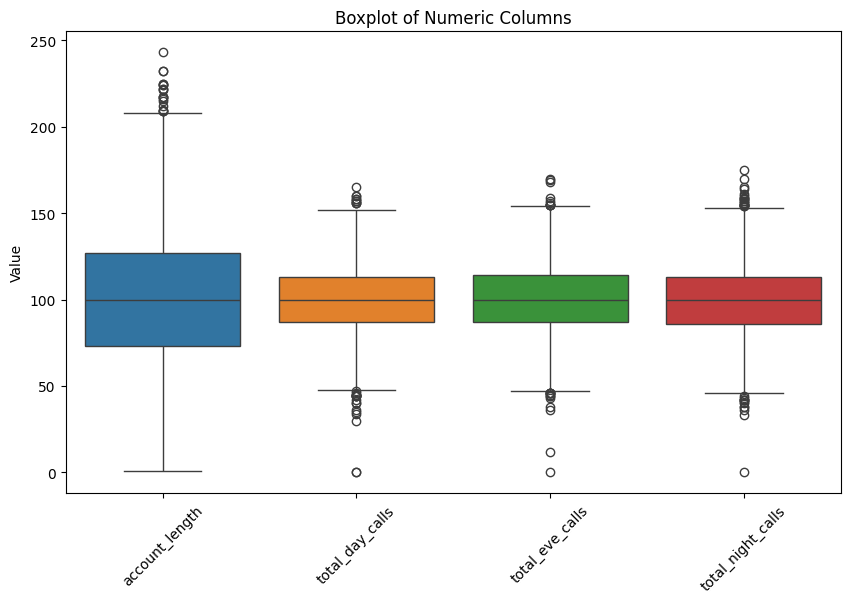

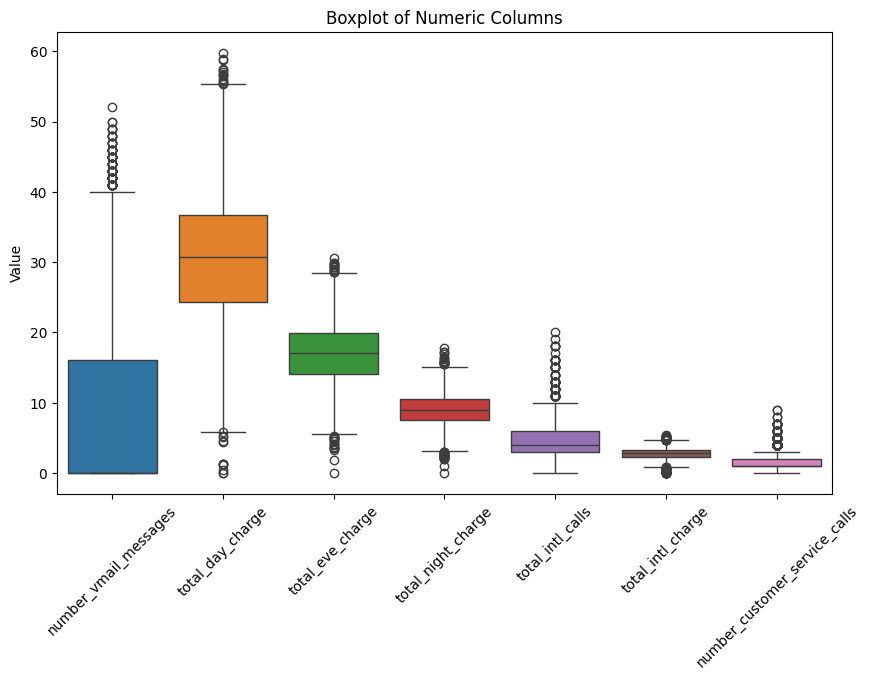

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df.select_dtypes(include='number').columns ][['account_length', 'total_day_calls', 'total_eve_calls',  'total_night_calls']])
plt.title('Boxplot of Numeric Columns')
plt.ylabel('Value')
plt.xticks(rotation=45) 
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df.select_dtypes(include='number').columns ].drop(columns=['account_length', 'total_day_calls', 'total_eve_calls', 'total_night_calls']))
plt.title('Boxplot of Numeric Columns')
plt.ylabel('Value')
plt.xticks(rotation=45) 
plt.show()

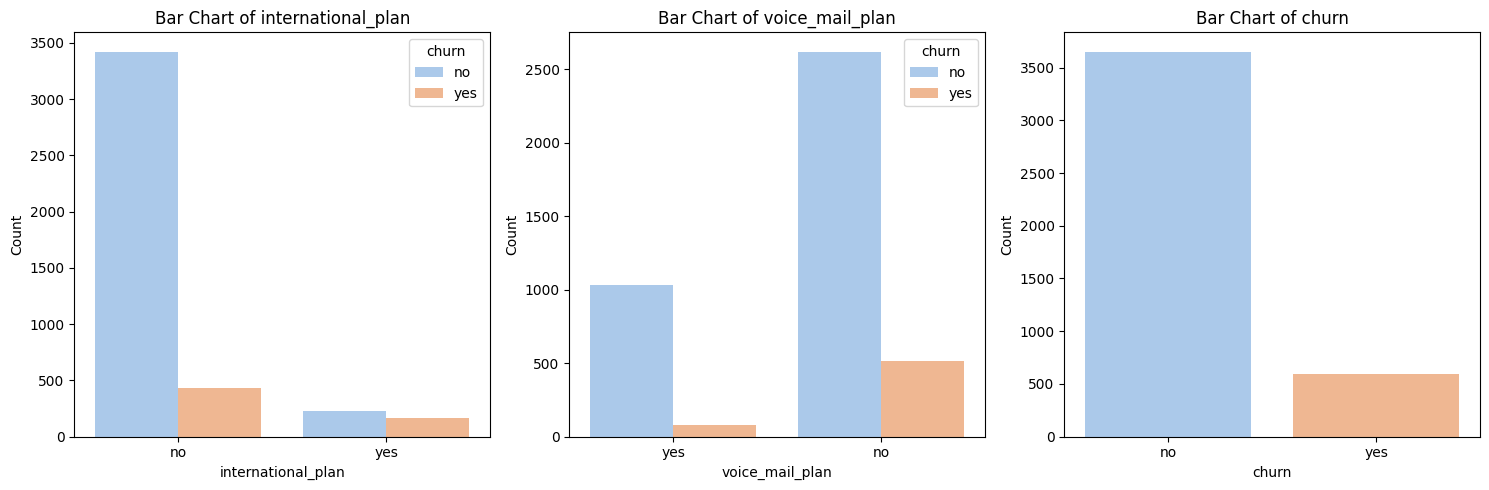

In [33]:
df_dummy = df[df.select_dtypes(include='object').columns ].drop(columns=['area_code','state'])
fig, axes = plt.subplots(ncols=len(df_dummy.columns), nrows=1, figsize=(15,5))

# Plot countplots for each categorical column
for i, column in enumerate(df_dummy.columns):
    sns.countplot(data=df_dummy, x=column, hue='churn',palette='pastel', ax=axes[i])
    axes[i].set_title(f'Bar Chart of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

    people with a voicemail plan are less likely to churn.
    propl with a international plan are likely to churn.

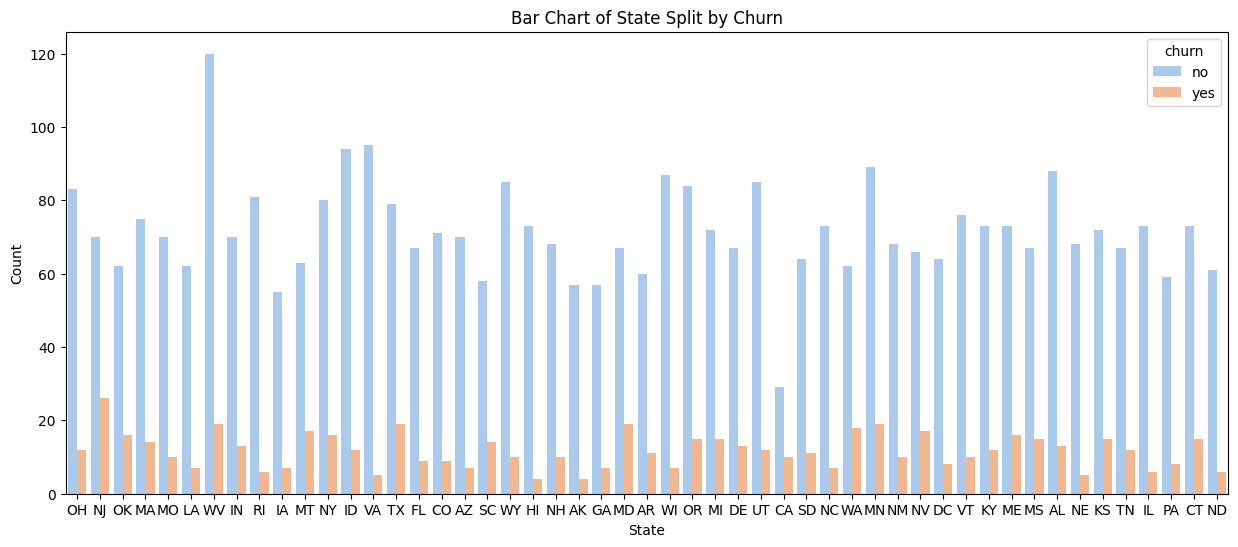

In [34]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='state', hue='churn', palette='pastel')
plt.title('Bar Chart of State Split by Churn')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

    NJ has the highest churn and Hi has the lowest churn rates.

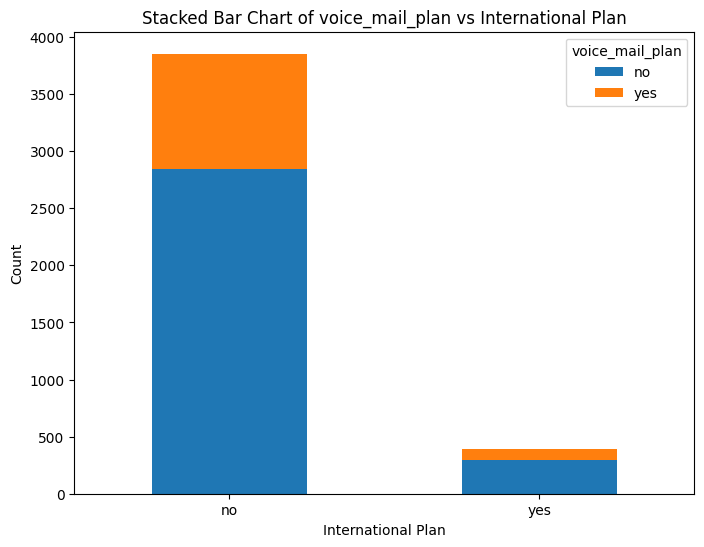

In [35]:
       
cross_tab = pd.crosstab(df['international_plan'], df['voice_mail_plan'])

cross_tab.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Stacked Bar Chart of voice_mail_plan vs International Plan')
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.legend(title='voice_mail_plan')
plt.show()

    people who have international plan are likely to not have voice mail plan.

    investigating the important numerical columns for international plann 
    total_intl_minutes, total_intl_calls, total_intl_charge, number_customer_service_calls.

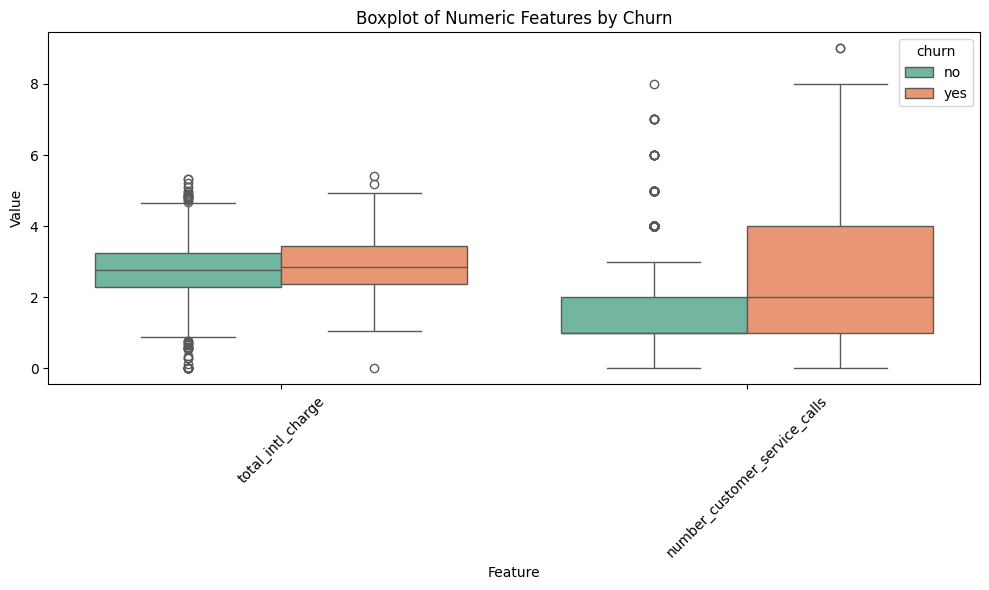

In [36]:
df_combined = pd.melt(df, id_vars=['churn'], value_vars=['total_intl_charge', 'number_customer_service_calls'], var_name='Feature', value_name='Value')

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Feature', y='Value', hue='churn', data=df_combined, palette='Set2')
plt.title('Boxplot of Numeric Features by Churn')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

    people who churn have  notisably higher customer service calls.

ploting a scatter plot between number_customer_service_calls and total_intl_charge to see a combined relation with churn.

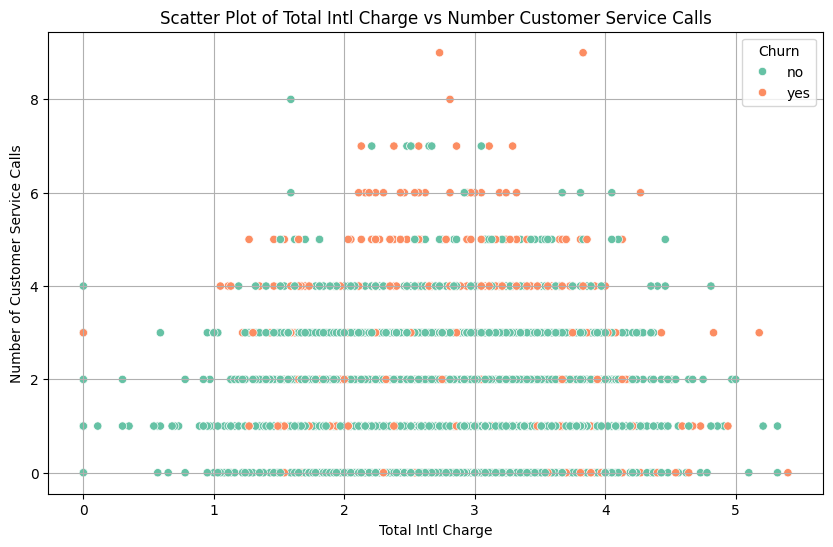

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_intl_charge', y='number_customer_service_calls', hue='churn', palette='Set2')
plt.title('Scatter Plot of Total Intl Charge vs Number Customer Service Calls')
plt.xlabel('Total Intl Charge')
plt.ylabel('Number of Customer Service Calls')
plt.legend(title='Churn')
plt.grid(True)
plt.show()

there are no combined relation with churn.
thus total_intl_charge column is redundent.

checking whether area code is usefull.

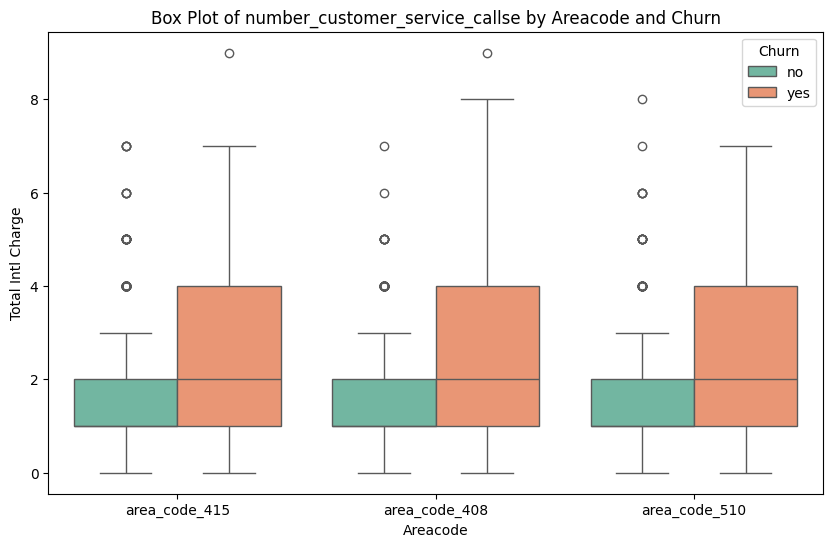

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='area_code', y='number_customer_service_calls', hue='churn', palette='Set2')
plt.title('Box Plot of number_customer_service_callse by Areacode and Churn')
plt.xlabel('Areacode')
plt.ylabel('Total Intl Charge')
plt.legend(title='Churn')
plt.show()

area code is redundent as well.

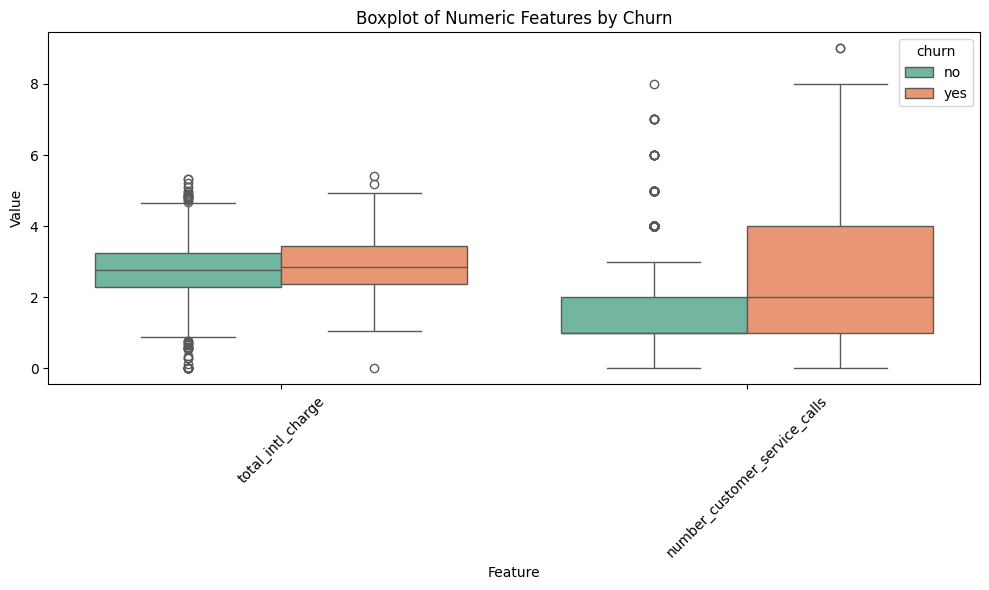

In [39]:
df_combined = pd.melt(df, id_vars=['churn'], value_vars=['total_intl_charge', 'number_customer_service_calls'], var_name='Feature', value_name='Value')

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Feature', y='Value', hue='churn', data=df_combined, palette='Set2')
plt.title('Boxplot of Numeric Features by Churn')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

account length is redundent.

investigating relation betweem account_length number_vmail_messages total_day_calls   total_day_charge    total_eve_calls   total_eve_charge  total_night_calls  total_night_charge.

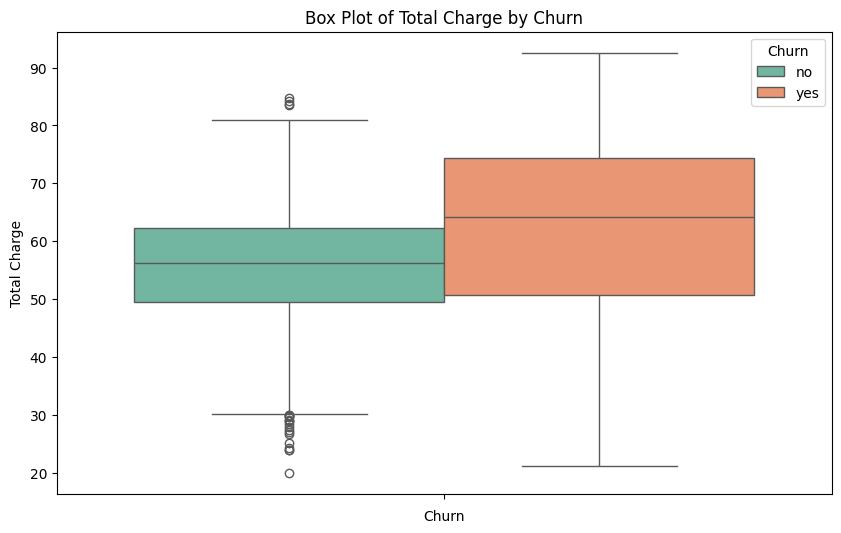

In [40]:
df['total_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='total_charge', hue='churn', palette='Set2')
plt.title('Box Plot of Total Charge by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charge')
plt.legend(title='Churn')
plt.show()

    sum of total_day_charge, total_eve_charge, total_night_charge for churn are higher than  non churn.
    thus this new column containing all the sum of charges is a good feature.

In [41]:
continuous_features = ['number_vmail_messages']

target_variable = 'churn'

# Perform ANOVA for each continuous feature
for feature in continuous_features:
    # Group data by the target variable categories
    group1 = df[df[target_variable] == 'no'][feature]         
    group2 = df[df[target_variable] == 'yes'][feature]
    
    # Perform ANOVA
    f_statistic, p_value = f_oneway(group1,  group2)

    print(f"ANOVA for '{feature}':")
    print(f"F-statistic: {f_statistic:.4f}")
    print(f"P-value: {p_value:.4f}")
    print()

ANOVA for 'number_vmail_messages':
F-statistic: 43.2100
P-value: 0.0000



based on the ANOVA test between churn and number_vmail_messages

In [42]:
contingency_table = pd.crosstab(df['state'], df['churn'])

# No Performing the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print("Chi-Square Statistic: {:.4f}".format(chi2))
print("P-value: {:.4f}".format(p_value))

contingency_table = pd.crosstab(df['international_plan'], df['churn'])

# No Performing the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print("Chi-Square Statistic: {:.4f}".format(chi2))
print("P-value: {:.4f}".format(p_value))

contingency_table = pd.crosstab(df['voice_mail_plan'], df['churn'])

# No Performing the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print("Chi-Square Statistic: {:.4f}".format(chi2))
print("P-value: {:.4f}".format(p_value))


Chi-Square Test Results:
Chi-Square Statistic: 85.9937
P-value: 0.0012

Chi-Square Test Results:
Chi-Square Statistic: 282.6535
P-value: 0.0000

Chi-Square Test Results:
Chi-Square Statistic: 55.1098
P-value: 0.0000


based on the chi square test between churn and (state, internation_plan,coice_mail_plan)

**Feature selection**

    based on eda area_code and total_intl_charges are also usless.
    the new total chargest columnw we created is a good candidate too.
    in eda using chi quare test we saw that state,international_plan and voice_mail_plan has an influence on churn too.


In [43]:
df_new = df[['state','total_charge','international_plan','voice_mail_plan','number_customer_service_calls','churn']]

In [44]:
df_new.to_csv('churn2_new.csv')